## Raster plots

In [1]:
%matplotlib inline
from build_network import *
from utilities1 import save_figure


              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.7.0
 Built: May 19 2024 15:53:53

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.



In [2]:
def sinus(phi, f, A, t):
    return phi+A*np.sin(2 * np.pi * f * t/1000 + np.pi/2)

def raster(sim_time=1000, second_sine=False, noisy=False, 
           f=10, a=100, sd=250, beat=20, xMax=1000, lead=0): 
    # Simulate
    res = build_network(sim_time=sim_time, second_sine=second_sine, noisy=noisy, 
                  f1=f, a=a, SD=sd, beat=beat, delay_sd=0.2,
                  V_thresh=-50.0, E_m=-60.0, tau_m=10, weight=5,
                  seed=np.random.randint(0,1e6), resolution=0.25, measure_from_A=True, num_A=100)

    # Extract values
    plt.rcParams["font.family"] = "Liberation Serif"
    num_neurons = 10 #number to plot raster plot from 
    num_A = 1000 #total number 
    spike_recorder = res["spike_recorder_raster"]

    events = spike_recorder.get("events")
    spike_times = events["times"]
    spike_times = spike_times
    ids = events["senders"]
    
    spike_times_tot = res["tot_ts"]
    
    

    # Histogram
    bin_width = 2.5  # ms
    bins = np.arange(100, sim_time+bin_width, bin_width)
    hist, _ = np.histogram(spike_times_tot, bins=bins, density=True)
    rate = hist / (bin_width / 1000) / num_neurons  # Hz
    # Sine wave
    T = np.linspace(100, sim_time, 100000)
    A = np.max(rate)
    sine_wave = [sinus(0.5*A, f, 0.25*A, t + lead) for t in T]

    # Raster
    plt.figure()
    #nest.raster_plot.from_device(spike_recorder)
    
    # Raster plot
    figs, axs = plt.subplots(2, height_ratios=[2,1])
    axs[0].scatter(spike_times, ids, color="mediumturquoise")
    axs[0].set_xlim(100,xMax)
    axs[0].set_ylabel("Neuron ID", color="#006D5B")
    axs[0].set_facecolor("#F5F5F5")
    axs[0].set_title("Raster plot and distribution of action potentials", fontweight='bold', color="#006D5B")
    # Plot histogram sinus
    if second_sine:
        axs[1].plot(T, sine_wave, color="#006D5B", label=f"f={f}Hz", alpha=0.9, linewidth=0.1)
        
    axs[1].bar(bins[:-1], rate, width=bin_width, color='mediumturquoise',  alpha=0.6, label='Firing rate', edgecolor='black')
    
    if second_sine == False:
        axs[1].plot(T, sine_wave, color="#006D5B", label=f"f={f}Hz")
        
    axs[1].set_xlabel("Time [ms]", color="#006D5B")
    axs[1].set_ylabel("Rate [Hz]", color="#006D5B")
    axs[1].set_xlim(100,xMax)
    ymax = max(np.max(sine_wave),np.max(rate))
    axs[1].set_ylim(0,ymax + 0.1*ymax)
    axs[1].legend()
    axs[1].set_facecolor("#F5F5F5")
    
    if second_sine:
        sine_wave = [sinus(0.5*A, beat, 0.25*A, t+- lead) for t in T]
        axs[1].plot(T, sine_wave, color="#006D5B", label=f"f={beat}Hz")
    
    axs[1].legend()
    
    save_figure("raster")
    
    plt.tight_layout()
    plt.show()



May 15 10:16:49 correlospinmatrix_detector [Info]: 
    Default for delta_tau changed from 0.1 to 0.25 ms

May 15 10:16:49 SimulationManager::set_status [Info]: 
    Temporal resolution changed from 0.1 to 0.25 ms.
Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/raster.png


<Figure size 640x480 with 0 Axes>

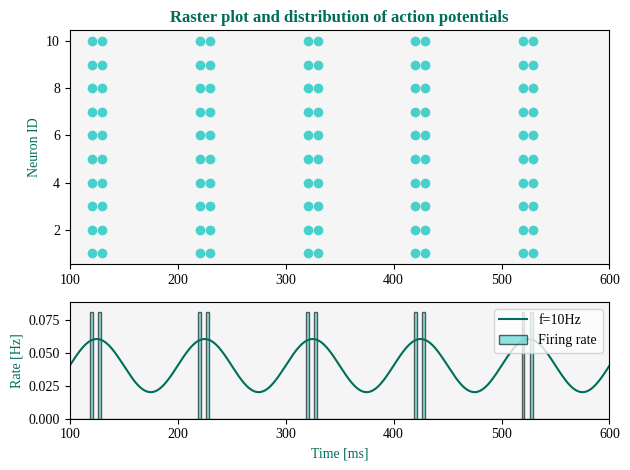

In [3]:
raster(sim_time=10000, second_sine=False, noisy=False, xMax=600,
                  f=10, a=300, sd=250, lead=75)

Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/raster.png


<Figure size 640x480 with 0 Axes>

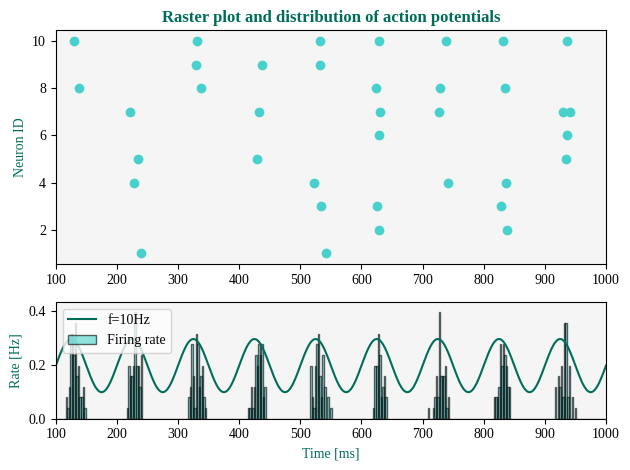

In [4]:
raster(sim_time=1000, second_sine=False, noisy=True, 
                  f=10, a=120, sd=250, lead=-25)

Saved plot as: /mnt/user/shared/Tonjes_CompNeuro/comp_neuro_course/master/notebooks/results/raster.png


<Figure size 640x480 with 0 Axes>

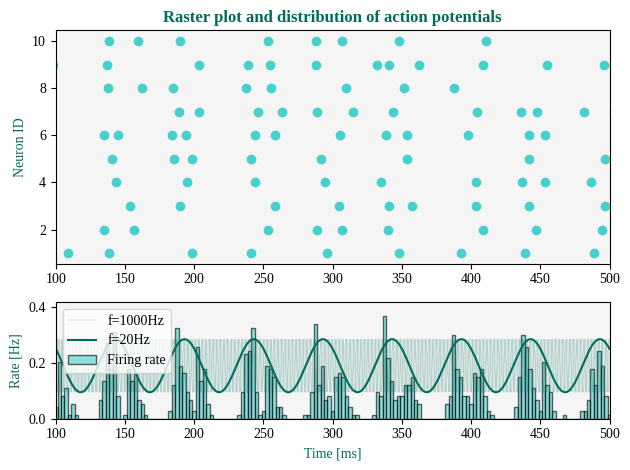

In [5]:
raster(sim_time=600, second_sine=True, noisy=True, lead=-7,
                  f=1000, a=5000, sd=250, beat=20, xMax=500)